In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

In [6]:
## I will work on red wine

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('winequality-red.csv', delimiter = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
## What are the qualities of wines
df['quality'].unique()
## Here it also should be some 1, 2, 9, and 10
## Because it is rating from 1 - 10.

array([5, 6, 7, 4, 8, 3])

In [12]:
## Data description
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
## Here it seems that in `free sulfur dioxide` and `total sulfur dioxide` have some outliers.
## Let's continue with that

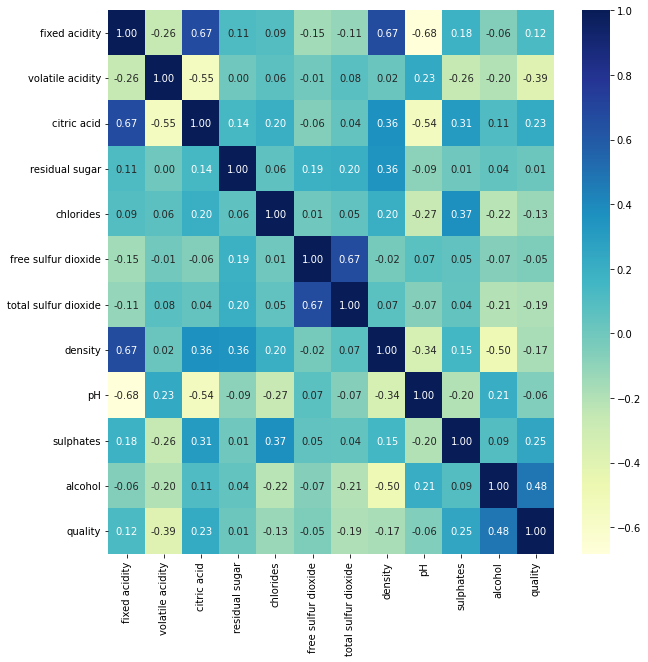

In [25]:
## Cheking the correlation of data

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True, fmt = '1.2f',cmap='YlGnBu')

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [27]:
## There is higly mutual corelation between density, fixed acid and critic acid and
## also between the free sulfur and  total sulfur

## I am considering the correlation of minimum 10% and no mutual correlation between the fearures
## So columns are 

features = ['fixed acidity', 'volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol', 'quality']

In [28]:
new_df = df[features]

In [29]:
new_df.head()

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.076,34.0,0.9978,0.56,9.4,5


In [33]:
## Checking the duplicates
new_df[new_df.duplicated()]

,fixed acidity,volatile acidity,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
4,7.4,0.700,0.076,34.0,0.99780,0.56,9.4,5
11,7.5,0.500,0.071,102.0,0.99780,0.80,10.5,5
27,7.9,0.430,0.106,37.0,0.99660,0.91,9.5,5
40,7.3,0.450,0.074,87.0,0.99780,0.83,10.5,5
65,7.2,0.725,0.086,11.0,0.99620,0.39,10.9,5
...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.076,20.0,0.99546,0.54,10.1,5
1564,7.2,0.695,0.076,20.0,0.99546,0.54,10.1,5
1567,7.2,0.695,0.076,20.0,0.99546,0.54,10.1,5
1581,6.2,0.560,0.053,32.0,0.99402,0.60,11.3,5


In [34]:
## There are 240 row duplicate so drop it
new_df.drop_duplicates(keep ='first', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [35]:
new_df.duplicated().any()

False

In [36]:
## Now checking the nan values
new_df.isna().any()

fixed acidity           False
volatile acidity        False
chlorides               False
total sulfur dioxide    False
density                 False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [37]:
## Cheking the bias of data
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


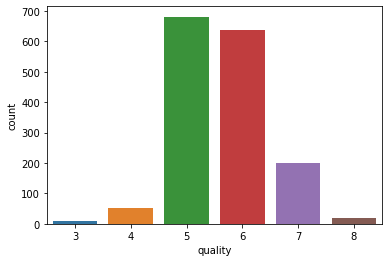

In [38]:
## Here the data is completely bias
sns.countplot(df['quality'])

In [51]:
## Splitting the data now
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [41]:
## using the SMOTE method to imbalance data
# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print("Root mean squared value: ", mean_squared_error(pred, y_test)**0.5)
print("Accuracy score : ", accuracy_score(y_test, np.round(pred)))
print("Confusion matrix : \n", confusion_matrix(y_test, np.round(pred)))

Root mean squared value:  0.624519930798013
Accuracy score :  0.571875
Confusion matrix : 
 [[ 0  0  1  0  0  0]
 [ 0  0  9  1  0  0]
 [ 0  0 91 39  0  0]
 [ 0  0 40 87  5  0]
 [ 0  0  0 37  5  0]
 [ 0  0  0  1  4  0]]


In [59]:
## Now using KNN
from sklearn.neighbors import KNeighborsClassifier as KNN

In [64]:
model = KNN(10)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print("Root mean squared value: ", mean_squared_error(pred, y_test)**0.5)
print("Accuracy score : ", accuracy_score(y_test, np.round(pred)))
print("Confusion matrix : \n", confusion_matrix(y_test, np.round(pred)))

Root mean squared value:  0.7158910531638176
Accuracy score :  0.5875
Confusion matrix : 
 [[ 0  0  0  1  0  0]
 [ 0  0  7  3  0  0]
 [ 0  1 95 34  0  0]
 [ 0  0 48 76  8  0]
 [ 0  0  2 23 17  0]
 [ 0  0  0  3  2  0]]


In [65]:
## Now using RandomForest
from sklearn.ensemble import RandomForestRegressor as RF

In [67]:
model = RF(max_depth = 20, min_samples_split = 10)
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print("Root mean squared value: ", mean_squared_error(pred, y_test)**0.5)
print("Accuracy score : ", accuracy_score(y_test, np.round(pred)))
print("Confusion matrix : \n", confusion_matrix(y_test, np.round(pred)))

Root mean squared value:  0.5685536536633566
Accuracy score :  0.628125
Confusion matrix : 
 [[  0   0   1   0   0   0]
 [  0   1   7   2   0   0]
 [  0   0 101  28   1   0]
 [  0   0  36  86  10   0]
 [  0   0   0  29  13   0]
 [  0   0   0   2   3   0]]


In [68]:
## Try SVM
from sklearn.svm import SVR
model = SVR()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print("Root mean squared value: ", mean_squared_error(pred, y_test)**0.5)
print("Accuracy score : ", accuracy_score(y_test, np.round(pred)))
print("Confusion matrix : \n", confusion_matrix(y_test, np.round(pred)))

Root mean squared value:  0.5927681962816934
Accuracy score :  0.603125
Confusion matrix : 
 [[  0   0   1   0   0   0]
 [  0   0   8   2   0   0]
 [  0   0 100  30   0   0]
 [  0   0  44  79   9   0]
 [  0   0   1  27  14   0]
 [  0   0   0   2   3   0]]


In [71]:
## Now using classification problem
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)
print("Accuracy score : ", accuracy_score(y_test, np.round(pred)))
print("Confusion matrix : \n", confusion_matrix(y_test, np.round(pred)))

Accuracy score :  0.653125
Confusion matrix : 
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 98 31  1  0]
 [ 0  0 34 91  7  0]
 [ 0  0  0 22 20  0]
 [ 0  0  0  0  5  0]]
